# Programming for Data Analysis Project

**Problem statement**

create a data set by simulating a real-world phenomenon. Then,  model and synthesise data using Python by using
the `numpy.random` package.

**Guidelines**:
    
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – them
data set itself can simply be displayed in an output cell within the notebook.


## Simulating Dublin Airport Passenger Movements in 2018

Dublin airport is the main airport in the Republic of Ireland. It was established 80 years ago. Dublin Airport officially opened at 9:00am on January 19, 1940. It was a cold Friday morning when the inaugural flight - an Aer Lingus Lockheed 14 bound for Liverpool - departed from Collinstown Airport, as it was then known.

In this assignment, I will analyse some profile of passengers that were using the airport in 2018 within one hour time frame.

Number of passengers per year: 31.5 million in 2018 [1]

Average hourly passengers calculated by dividing 31.5 (million) / 364 (days, closed for Chrismas day) which gives us 86,5 (Thousands) passengers daily on average.

Hourly Passenger Rate = 31.5 (millions) / 364 (days, closed for Chrismas day)  / 24 (hours).

Hourly Passenger Rate = 3605 

So, we can anticipate that nearly a __one passenger each second__ was using the airport

We can anticipate that there was one passenger using the airport each second.

## Importing Packages:

In [1]:
# importing numerical library
import numpy as np

rng = np.random.default_rng()

# importing library to generate data frames
import pandas as pd

# importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# for interactive and inline rendered plots, we use the magic command
%matplotlib inline

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

### *DateTime* :

Generating a random array with `3600 seconds` that represents a time period of an hour in 2018.

In [2]:
# https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries
# importing datetime function from pandas
import datetime

# PCG64
rng = np.random.default_rng()

# adapted from https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas[3].

try:
    def random_dates(start, end, n=3600):
        start_u = start.value//10**9
        end_u = end.value//10**9         
        return pd.to_datetime(rng.integers(start_u, end_u, n), unit='s')
except Christmas:
    print("This is Christmas day, The Airport was closed!, Please try again")

Christmas = (2018-12-25)    
    
start = pd.to_datetime("2018-01-01")
end = pd.to_datetime("2018-12-31")

DateTime = random_dates(start, end)

In [3]:
DateTime

DatetimeIndex(['2018-09-21 16:44:03', '2018-05-02 00:36:48',
               '2018-09-14 19:18:15', '2018-11-07 04:46:35',
               '2018-11-28 13:12:39', '2018-05-16 16:08:24',
               '2018-04-11 13:24:43', '2018-05-04 21:50:35',
               '2018-04-05 09:49:20', '2018-01-13 10:45:49',
               ...
               '2018-08-03 20:41:02', '2018-10-15 19:29:32',
               '2018-10-06 11:32:40', '2018-02-11 06:29:56',
               '2018-07-25 16:14:47', '2018-06-19 13:03:13',
               '2018-08-28 12:48:15', '2018-04-01 07:22:37',
               '2018-01-30 17:22:36', '2018-10-09 22:22:58'],
              dtype='datetime64[ns]', length=3600, freq=None)

Text(0.5, 1.0, 'A Uniform Distribution resembling number of passengers movement')

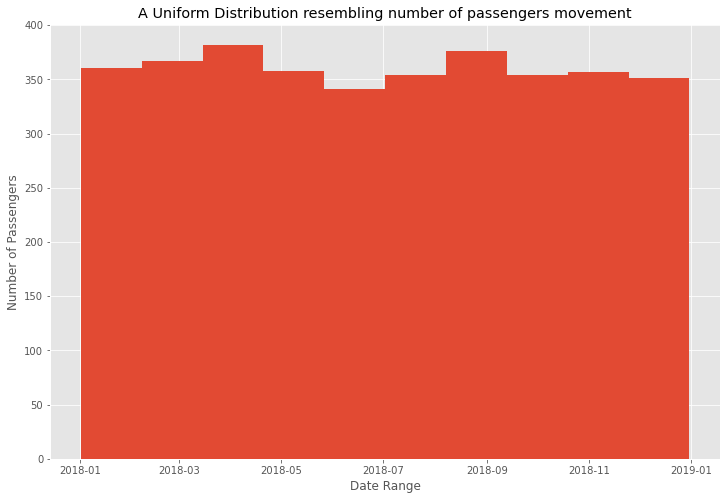

In [56]:
plt.hist(DateTime)
plt.xlabel("Date Range")
plt.ylabel("Number of Passengers")
plt.title("A Uniform Distribution resembling number of passengers movement")

***
<br>

### *Gender* :

Representaion of gender of the passengers as was reported[2]:

- __51% Male__

- __49% Female__


In [5]:
genders = ("male", "female")

p = (0.51, 0.49)

Gender = rng.choice(genders, size = 3600, p = p)

In [6]:
print("Gender Array is:", Gender)

Gender Array is: ['female' 'female' 'female' ... 'male' 'male' 'male']


***
<br>

### *Age* :

People of all ages pass through our doors here at Dublin Airport.

- __15%__ of our passengers are __`< 25`__

- __54%__ are between the ages of __`25-49`__

- __30%__ are aged 50 or older __`> 50`__ [2]

_Note: The total percentage doesn't mathematically correspond to 100% rate, so, there has been an adjustment on 25-49 age group which was reported to be 54%, new value assigned 55%_.

In [7]:
age_ranges = ("< 25", "25-49", "> 50")

p = (0.15, 0.55, 0.30)

Age = rng.choice(age_ranges, size = 3600, p = p)
print ("Age Array is:", Age)

Age Array is: ['< 25' '> 50' '> 50' ... '> 50' '> 50' '25-49']


***

<br>

### *Country of Residence* :

#### Generating the `Country of Residence`  array


People from all over the world visit Dublin Airport

- __48%__ of our passengers call the Republic of Ireland their home __(IE)__

- __18%__ arrive on our shores from the UK (including NI) __(UK / NI)__

- __17%__ visit us from Continental Europe __(EUP)__

- __16%__ come from North American destinations __(N-AMR)__

- __1%__ come from the Rest of the World __(RoW)__ [2]

In [8]:
# Country of Residence: CoR

CoR = ("IE", "UK/NI", "EUP", "N-AMR", "RoW")
p = (0.48, 0.18, 0.17, 0.16, 0.01)

CoR = rng.choice(CoR, size = 3600, p = p)


In [9]:
CoR

array(['UK/NI', 'EUP', 'EUP', ..., 'IE', 'UK/NI', 'N-AMR'], dtype='<U5')

***
<br>

### *Socio-Economic Class*:

- ABC1s __71%__

- C2DEs __29%__

- Farmers __1%__ [2]

_Note: The total percentage doesn't mathematically correspond to 100% rate, so, there has been an adjustment on the ABC1s which was reported to be 71%,, new value assigned 70%_.

In [10]:
# Socio-Economic Class : SEC

SEC = ("ABC1s", "C2DEs", "Farmers")
p = (0.70, 0.29, 0.01)

SEC = rng.choice(SEC, size = 3600, p = p)


***
<br>

### Generating The Data Frame

In [11]:
df = pd.DataFrame({"DateTime" : DateTime, "Gender" : Gender, "Age" : Age, "CoR" : CoR, "SEC" : SEC})

In [12]:
df

,DateTime,Gender,Age,CoR,SEC
0,2018-09-21 16:44:03,female,< 25,UK/NI,ABC1s
1,2018-05-02 00:36:48,female,> 50,EUP,C2DEs
2,2018-09-14 19:18:15,female,> 50,EUP,C2DEs
3,2018-11-07 04:46:35,male,> 50,IE,ABC1s
4,2018-11-28 13:12:39,male,> 50,IE,C2DEs
...,...,...,...,...,...
3595,2018-06-19 13:03:13,male,25-49,N-AMR,ABC1s
3596,2018-08-28 12:48:15,male,< 25,UK/NI,ABC1s
3597,2018-04-01 07:22:37,male,> 50,IE,C2DEs
3598,2018-01-30 17:22:36,male,> 50,UK/NI,ABC1s


In [13]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
DateTime,2018-09-21 16:44:03,2018-05-02 00:36:48,2018-09-14 19:18:15,2018-11-07 04:46:35,2018-11-28 13:12:39,2018-05-16 16:08:24,2018-04-11 13:24:43,2018-05-04 21:50:35,2018-04-05 09:49:20,2018-01-13 10:45:49,...,2018-08-03 20:41:02,2018-10-15 19:29:32,2018-10-06 11:32:40,2018-02-11 06:29:56,2018-07-25 16:14:47,2018-06-19 13:03:13,2018-08-28 12:48:15,2018-04-01 07:22:37,2018-01-30 17:22:36,2018-10-09 22:22:58
Gender,female,female,female,male,male,male,male,male,female,male,...,female,female,female,female,male,male,male,male,male,male
Age,< 25,> 50,> 50,> 50,> 50,< 25,> 50,25-49,25-49,> 50,...,25-49,25-49,< 25,25-49,> 50,25-49,< 25,> 50,> 50,25-49
CoR,UK/NI,EUP,EUP,IE,IE,UK/NI,IE,IE,UK/NI,N-AMR,...,EUP,N-AMR,N-AMR,N-AMR,IE,N-AMR,UK/NI,IE,UK/NI,N-AMR
SEC,ABC1s,C2DEs,C2DEs,ABC1s,C2DEs,ABC1s,ABC1s,ABC1s,C2DEs,ABC1s,...,C2DEs,C2DEs,ABC1s,C2DEs,C2DEs,ABC1s,ABC1s,C2DEs,ABC1s,ABC1s


In [14]:
df.head()

,DateTime,Gender,Age,CoR,SEC
0,2018-09-21 16:44:03,female,< 25,UK/NI,ABC1s
1,2018-05-02 00:36:48,female,> 50,EUP,C2DEs
2,2018-09-14 19:18:15,female,> 50,EUP,C2DEs
3,2018-11-07 04:46:35,male,> 50,IE,ABC1s
4,2018-11-28 13:12:39,male,> 50,IE,C2DEs


In [15]:
df.describe()

,DateTime,Gender,Age,CoR,SEC
count,3600,3600,3600,3600,3600
unique,3600,2,3,5,3
top,2018-08-31 17:24:22,male,25-49,IE,ABC1s
freq,1,1813,1964,1736,2536
first,2018-01-01 06:04:58,NaN,NaN,NaN,NaN
last,2018-12-30 19:18:07,NaN,NaN,NaN,NaN


In [16]:
df.mean


<bound method DataFrame.mean of                 DateTime  Gender    Age    CoR    SEC
0    2018-09-21 16:44:03  female   < 25  UK/NI  ABC1s
1    2018-05-02 00:36:48  female   > 50    EUP  C2DEs
2    2018-09-14 19:18:15  female   > 50    EUP  C2DEs
3    2018-11-07 04:46:35    male   > 50     IE  ABC1s
4    2018-11-28 13:12:39    male   > 50     IE  C2DEs
...                  ...     ...    ...    ...    ...
3595 2018-06-19 13:03:13    male  25-49  N-AMR  ABC1s
3596 2018-08-28 12:48:15    male   < 25  UK/NI  ABC1s
3597 2018-04-01 07:22:37    male   > 50     IE  C2DEs
3598 2018-01-30 17:22:36    male   > 50  UK/NI  ABC1s
3599 2018-10-09 22:22:58    male  25-49  N-AMR  ABC1s

[3600 rows x 5 columns]>

## References:

[1] Dublin Airport; Facts and Figures: https://www.dublinairport.com/corporate/about-us/facts-and-figures

[2] Dublin Airport; Passenger Profile: https://www.dublinairport.com/corporate/about-us/passenger-profile

[3] caktusgroup: https://www.caktusgroup.com/blog/2020/04/15/quick-guide-generating-fake-data-with-pandas/

[4] stackoverflow: https://stackoverflow.com/questions/50559078/generating-random-dates-within-a-given-range-in-pandas

https://www.hbs.edu/faculty/Publication%20Files/19-040_89360426-c7a9-4aac-95e1-a3a3db276dc8.pdf


## End